# nltk

In [33]:
import numpy as np
import os
import sys
import math
import torch
import time
import re
import cv2
from pathlib import Path
from tqdm import tqdm
from matplotlib import pyplot as plt
from torchvision import transforms
from icecream import ic
from itertools import repeat
# import sympy as sy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import nltk

In [5]:
sentence = "At eight o'clock on Thursday morning Arthur didn't feel very good."

In [9]:
tokens = nltk.word_tokenize(sentence)
tokens

['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

In [10]:
tagged = nltk.pos_tag(tokens)
tagged

[('At', 'IN'),
 ('eight', 'CD'),
 ("o'clock", 'NN'),
 ('on', 'IN'),
 ('Thursday', 'NNP'),
 ('morning', 'NN'),
 ('Arthur', 'NNP'),
 ('did', 'VBD'),
 ("n't", 'RB'),
 ('feel', 'VB'),
 ('very', 'RB'),
 ('good', 'JJ'),
 ('.', '.')]

In [13]:
# !pip install svgling

Looking in indexes: http://pypi.douban.com/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 1.2 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


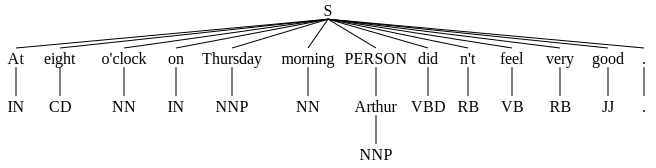

In [14]:
entitles = nltk.chunk.ne_chunk(tagged)
entitles

In [15]:
from nltk.corpus import treebank

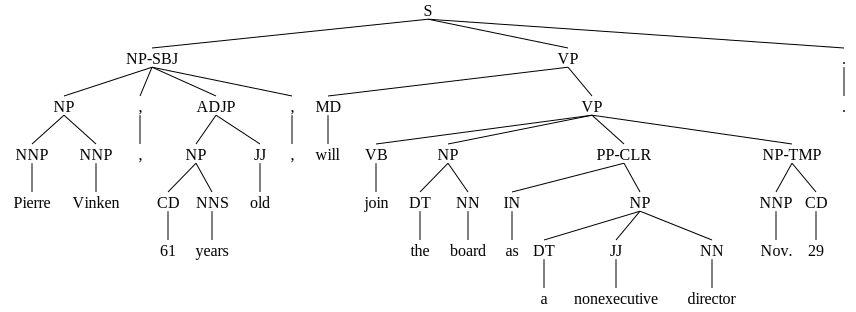

In [19]:
t = treebank.parsed_sents('wsj_0001.mrg')[0]
t
# t.draw()

# jieba

In [20]:
import jieba

In [21]:
jieba.enable_paddle()

Installing paddle-tiny, please wait a minute......


Looking in indexes: http://pypi.douban.com/simple


ERROR: Could not find a version that satisfies the requirement paddlepaddle-tiny (from versions: none)
ERROR: No matching distribution found for paddlepaddle-tiny
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Import paddle error, please use command to install: pip install paddlepaddle-tiny==1.6.1.Now, back to jieba basic cut......


UnboundLocalError: local variable 'paddle' referenced before assignment

In [22]:
strs = ['我来自北京清华大学','乒乓球卖完了','中国科技大学']

In [25]:
for s in strs:
    seglist = jieba.cut(s, use_paddle=True)
    print('/'.join(seglist))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.686 seconds.
Prefix dict has been built successfully.


我/来自/北京/清华大学
乒乓球/卖完/了
中国科技大学


In [26]:
s = '我来自北京清华大学'
seglist = jieba.cut(s, cut_all=True)
print('/'.join(seglist))

我/来自/北京/清华/清华大学/华大/大学


In [27]:
s = '我来自北京清华大学'
seglist = jieba.cut(s, cut_all=False)
print('/'.join(seglist))

我/来自/北京/清华大学


In [28]:
s = '小明硕士毕业于中国科学院计算所，后在日本京都大学深造'
seglist = jieba.cut_for_search(s)
print('/'.join(seglist))

小明/硕士/毕业/于/中国/科学/学院/科学院/中国科学院/计算/计算所/，/后/在/日本/京都/大学/日本京都大学/深造


# Snownlp

In [30]:
# !pip install snownlp

Looking in indexes: http://pypi.douban.com/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 6.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for snownlp: filename=snownlp-0.12.3-py3-none-any.whl size=37760957 sha256=704bacf66a5e6eb0fa0df07ed7a8b39b612a35f33d20c1629031a470418696b6
  Stored in directory: /root/.cache/pip/wheels/5f/fc/db/dc277d589550cc99b7a0ded742e130a3917c196f58c16c96a7
Successfully built snownlp
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [31]:
from snownlp import SnowNLP

In [42]:
s = SnowNLP(u'这个东西真心很赞')
s.words
s.tags
s.sentiments
s.pinyin
s.tf
s.idf
s.sim(u'东西')
s.keywords()
s.summary()

['这个', '东西', '真心', '很', '赞']

0.9769551298267365

['zhe', 'ge', 'dong', 'xi', 'zhen', 'xin', 'hen', 'zan']

[{'这': 1},
 {'个': 1},
 {'东': 1},
 {'西': 1},
 {'真': 1},
 {'心': 1},
 {'很': 1},
 {'赞': 1}]

{'这': 1.6094379124341003,
 '个': 1.6094379124341003,
 '东': 1.6094379124341003,
 '西': 1.6094379124341003,
 '真': 1.6094379124341003,
 '心': 1.6094379124341003,
 '很': 1.6094379124341003,
 '赞': 1.6094379124341003}

[0, 0, 1.6094379124341003, 1.6094379124341003, 0, 0, 0, 0]

['赞', '很', '真心', '东西']

['这个东西真心很赞']

In [47]:
s = SnowNLP(u'自然语言处理是一门融语言学、计算机科学、数学于一体的科学，是计算机科学领域与人工智能领域中的一个重要方向')
s.words
s.tags
s.sentiments
s.pinyin
s.tf
s.idf
s.sim(u'东西')
s.keywords()
s.summary()

['自然',
 '语言',
 '处理',
 '是',
 '一',
 '门融',
 '语言',
 '学',
 '、',
 '计算机',
 '科学',
 '、',
 '数学',
 '于',
 '一体',
 '的',
 '科学',
 '，',
 '是',
 '计算机',
 '科学',
 '领域',
 '与',
 '人工',
 '智能',
 '领域',
 '中',
 '的',
 '一个',
 '重要',
 '方向']

0.9999999970670965

['Zi',
 'ran',
 'yu',
 'yan',
 'chu',
 'li',
 'shi',
 'yi',
 'men',
 'rong',
 'yu',
 'yan',
 'xue',
 '、',
 'ji',
 'suan',
 'ji',
 'ke',
 'xue',
 '、',
 'shu',
 'xue',
 '于',
 'yi',
 'ti',
 'de',
 'ke',
 'xue',
 '，',
 'shi',
 'ji',
 'suan',
 'ji',
 'ke',
 'xue',
 'ling',
 'yu',
 '与',
 'ren',
 'gong',
 'zhi',
 'neng',
 'ling',
 'yu',
 'zhong',
 'de',
 'yi',
 'ge',
 'zhong',
 'yao',
 'fang',
 'xiang']

[{'自': 1},
 {'然': 1},
 {'语': 1},
 {'言': 1},
 {'处': 1},
 {'理': 1},
 {'是': 1},
 {'一': 1},
 {'门': 1},
 {'融': 1},
 {'语': 1},
 {'言': 1},
 {'学': 1},
 {'、': 1},
 {'计': 1},
 {'算': 1},
 {'机': 1},
 {'科': 1},
 {'学': 1},
 {'、': 1},
 {'数': 1},
 {'学': 1},
 {'于': 1},
 {'一': 1},
 {'体': 1},
 {'的': 1},
 {'科': 1},
 {'学': 1},
 {'，': 1},
 {'是': 1},
 {'计': 1},
 {'算': 1},
 {'机': 1},
 {'科': 1},
 {'学': 1},
 {'领': 1},
 {'域': 1},
 {'与': 1},
 {'人': 1},
 {'工': 1},
 {'智': 1},
 {'能': 1},
 {'领': 1},
 {'域': 1},
 {'中': 1},
 {'的': 1},
 {'一': 1},
 {'个': 1},
 {'重': 1},
 {'要': 1},
 {'方': 1},
 {'向': 1}]

{'自': 3.536116699561526,
 '然': 3.536116699561526,
 '语': 3.005682604407159,
 '言': 3.005682604407159,
 '处': 3.536116699561526,
 '理': 3.536116699561526,
 '是': 3.005682604407159,
 '一': 2.649209701079277,
 '门': 3.536116699561526,
 '融': 3.536116699561526,
 '学': 2.15598161880217,
 '、': 3.005682604407159,
 '计': 3.005682604407159,
 '算': 3.005682604407159,
 '机': 3.005682604407159,
 '科': 2.649209701079277,
 '数': 3.536116699561526,
 '于': 3.536116699561526,
 '体': 3.536116699561526,
 '的': 3.005682604407159,
 '，': 3.536116699561526,
 '领': 3.005682604407159,
 '域': 3.005682604407159,
 '与': 3.536116699561526,
 '人': 3.536116699561526,
 '工': 3.536116699561526,
 '智': 3.536116699561526,
 '能': 3.536116699561526,
 '中': 3.536116699561526,
 '个': 3.536116699561526,
 '重': 3.536116699561526,
 '要': 3.536116699561526,
 '方': 3.536116699561526,
 '向': 3.536116699561526}

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

['计算机', '科学', '学', '领域', '智能']

['自然语言处理是一门融语言学、计算机科学、数学于一体的科学', '是计算机科学领域与人工智能领域中的一个重要方向']

In [58]:
s = SnowNLP([[u'这篇',u'文章'],[u'那篇',u'论文'],[u'文章','论文'], [u'论文']])
# s.words
# s.tags
# s.sentiments
# s.pinyin
s.tf
s.idf
s.sim(u'文章')
# s.keywords()
# s.summary()

[{'这篇': 1, '文章': 1}, {'那篇': 1, '论文': 1}, {'文章': 1, '论文': 1}, {'论文': 1}]

{'这篇': 0.8472978603872037,
 '文章': 0.0,
 '那篇': 0.8472978603872037,
 '论文': -0.8472978603872037}

[0, 0, 0, 0]

In [43]:
np.log10(8)

0.9030899869919435

In [56]:
10**0.5108256237659907, np.exp(0.5108256237659907), np.exp(-0.5108256237659907)

(3.2420941590633925, 1.6666666666666667, 0.6)

# Pyrouge

In [59]:
!pip install pyrouge

Looking in indexes: http://pypi.douban.com/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 KB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyrouge: filename=pyrouge-0.1.3-py3-none-any.whl size=191613 sha256=3301c86c2ed991eab1e94f4329e98fb7517b195b5837b217c714ad411835bca1
  Stored in directory: /root/.cache/pip/wheels/d1/e8/fb/d5beac8d08d17aa1418972efdbecf80da5566db86e44fbfc0a
Successfully built pyrouge
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [60]:
from pyrouge import Rouge155

In [61]:
r = Rouge155()
r.system_dir = 'path/to/system_summaries'
r.model_dir = 'path/to/model_summaries'

FileNotFoundError: [Errno 2] No such file or directory: '/root/.pyrouge/settings.ini'

# LTP